In [63]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [64]:
x = np.random.random_sample((5,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
x = np.append(x, np.random.normal(0, 40, 30))


y = np.random.random_sample((5,)) * 90  
for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))

y = np.append(y, np.random.normal(0, 40, 30))

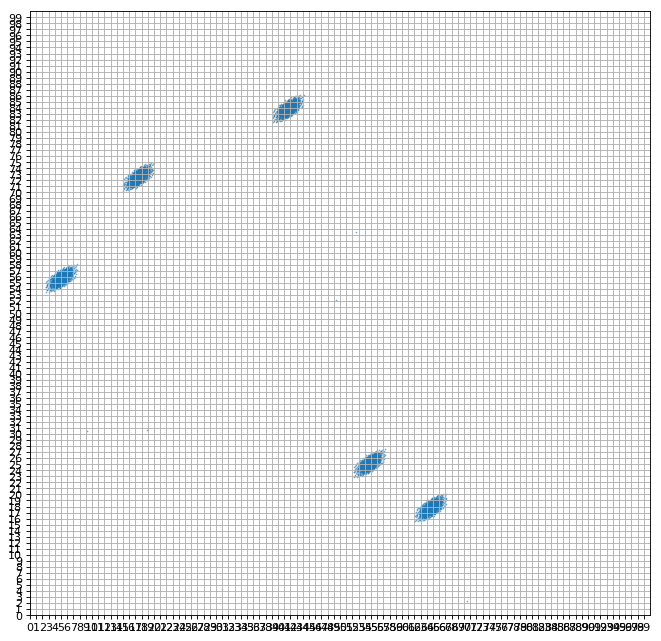

In [65]:
grid_size= 1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.1)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

In [66]:
cellSize=4
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
xTransformed = x - x1
print(x.size)

# print(xTransformed.size)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
# print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
# agg = np.column_stack((xTransformed, yTransformed))
# print(agg)


# np.array(setAgg[:,0], setAgg[:,1])

# setAgg=np.unique(agg, axis=0)

# print(setAgg.size)
# print(setAgg)

# plt.scatter(setAgg[:,0], setAgg[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.show()

5150


In [67]:
all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

dictCount={} 

for i in all_tuples:
    if(i in dictCount):
        dictCount[i] += 1
    else:
        dictCount[i] = 1


# print(dictCount)
# print(dictCount.values())
# values = np.asarray(dictCount.values())

values = np.fromiter(dictCount.values(), dtype=int)
# print(values.shape)
print(values)



keys = np.asarray(list(dictCount))
print(keys)
print(keys.shape)

[ 89  46 138  54  14 513 265 832 459 208 746 742  16 460 418 103   9   1
   1   4   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   2   1   1   1   1   1   1   1]
[[ 52.  20.]
 [ 36.  80.]
 [  0.  52.]
 [ 12.  68.]
 [ 60.  12.]
 [ 40.  80.]
 [ 60.  16.]
 [ 52.  24.]
 [  4.  52.]
 [ 16.  68.]
 [ 16.  72.]
 [ 64.  16.]
 [ 12.  72.]
 [ 40.  84.]
 [  4.  56.]
 [ 56.  24.]
 [  0.  56.]
 [ 64.  12.]
 [ 36.  84.]
 [ 44.  84.]
 [ 64.  20.]
 [-40.  68.]
 [-36.  76.]
 [-32.  36.]
 [-52.   4.]
 [108. -40.]
 [-64.  28.]
 [ 16.  28.]
 [ 72. -56.]
 [ 48.  52.]
 [-20.  12.]
 [-28.  -8.]
 [-48. -60.]
 [-36.  48.]
 [ -8. -12.]
 [-12. -28.]
 [-36.  16.]
 [-24. -20.]
 [ 12.  -8.]
 [ 44. -24.]
 [-60. -36.]
 [  8.  28.]
 [ 52. -28.]
 [ 28.   4.]
 [ 36. -68.]
 [-20. -40.]
 [ 52.  60.]
 [-24.  68.]
 [ 68.   0.]
 [-40.  64.]]
(50, 2)


In [68]:
# How to convert 

# https://stackoverflow.com/questions/23668509/dictionary-keys-and-values-to-separate-numpy-arrays
# Dictionary keys and values to separate numpy arrays
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)


values_cliped = (values - 30).clip(min=0)
print(values_cliped)


print(np.where( values_cliped !=0 ))



dataForClustering=keys[np.where( values_cliped !=0 )]
print(dataForClustering)


[ 59  16 108  24   0 483 235 802 429 178 716 712   0 430 388  73   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15]),)
[[52. 20.]
 [36. 80.]
 [ 0. 52.]
 [12. 68.]
 [40. 80.]
 [60. 16.]
 [52. 24.]
 [ 4. 52.]
 [16. 68.]
 [16. 72.]
 [64. 16.]
 [40. 84.]
 [ 4. 56.]
 [56. 24.]]


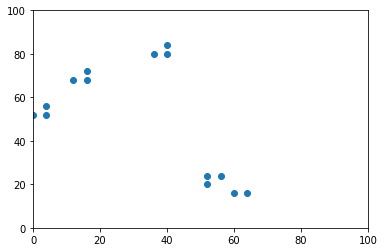

In [69]:
plt.scatter(dataForClustering[:,0], dataForClustering[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

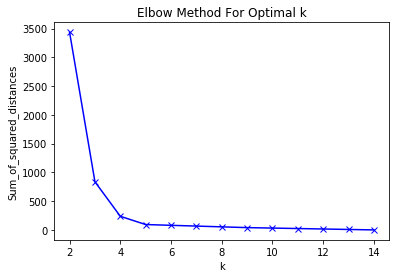

5
[[-25.66666667   6.33333333]
 [ 67.6         22.8       ]
 [ 38.          64.33333333]
 [-32.         -74.66666667]
 [ 14.         -20.5       ]]


In [70]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(dataForClustering)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.9 here is just a threshhold 
    if(ratio < 1.9):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(setAgg)
print(km.cluster_centers_)
